In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
discharge_09402300 = '../data/29XXBUHc.txt'
discharge_09402500 = '../data/hEKc9AHL.txt'
discharge_09402000 = '../data/PdVY5_8t.txt'
discharge_09403850 = '../data/U0ImJT4n.txt'

df_09402300 = pd.read_table(discharge_09402300, sep='\t', skiprows=35)
df_09402300 = df_09402300[1:]
df_09402300['date'] = pd.to_datetime(df_09402300['year_nu'].astype(str) + '-' + df_09402300['month_nu'])
df_09402300['mean_va'] = df_09402300['mean_va'].astype(float)
df_09402300['SMA10'] = df_09402300['mean_va'].rolling(30).mean()
df_09402300.set_index('date')

df_09402500 = pd.read_table(discharge_09402500, sep='\t', skiprows=35)
df_09402500 = df_09402500[1:]
df_09402500['date'] = pd.to_datetime(df_09402500['year_nu'].astype(str) + '-' + df_09402500['month_nu'])
df_09402500.set_index('date')
df_09402500['mean_va'] = df_09402500['mean_va'].astype(float)

df_09402000 = pd.read_table(discharge_09402000, sep='\t', skiprows=35)
df_09402000 = df_09402000[1:]
df_09402000['date'] = pd.to_datetime(df_09402000['year_nu'].astype(str) + '-' + df_09402000['month_nu'])
df_09402000.set_index('date')
df_09402000['mean_va'] = df_09402000['mean_va'].astype(float)

df_09403850 = pd.read_table(discharge_09403850, sep='\t', skiprows=35)
df_09403850 = df_09403850[1:]
df_09403850['date'] = pd.to_datetime(df_09403850['year_nu'].astype(str) + '-' + df_09403850['month_nu'])
df_09403850.set_index('date')
df_09403850['mean_va'] = df_09403850['mean_va'].astype(float)

In [69]:
df_09402300['SMA30'] = df_09402300['mean_va'].rolling(20).mean()
df_09402500['SMA30'] = df_09402500['mean_va'].rolling(20).mean()
df_09402000['SMA30'] = df_09402000['mean_va'].rolling(20).mean()
df_09403850['SMA30'] = df_09403850['mean_va'].rolling(20).mean()

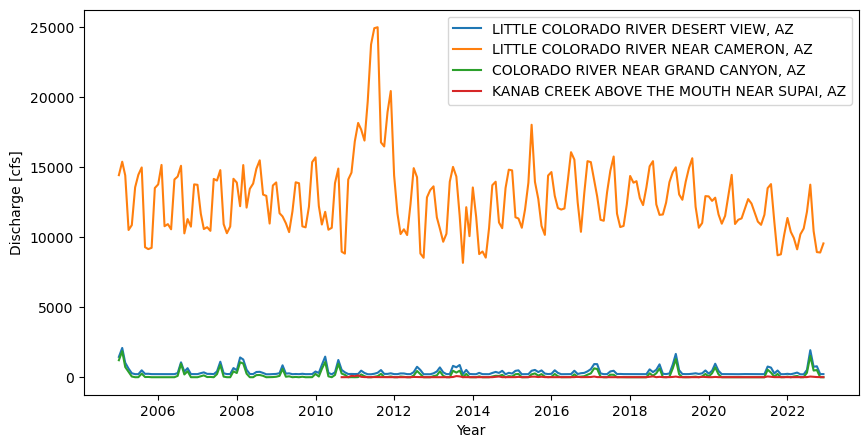

In [70]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(df_09402300['date'], df_09402300['mean_va'], label='LITTLE COLORADO RIVER DESERT VIEW, AZ')
ax.plot(df_09402500['date'], df_09402500['mean_va'], label='LITTLE COLORADO RIVER NEAR CAMERON, AZ')
ax.plot(df_09402000['date'], df_09402000['mean_va'], label='COLORADO RIVER NEAR GRAND CANYON, AZ')
ax.plot(df_09403850['date'], df_09403850['mean_va'], label='KANAB CREEK ABOVE THE MOUTH NEAR SUPAI, AZ')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge [cfs]')

plt.savefig('../figures/streamflow_multistation.png')

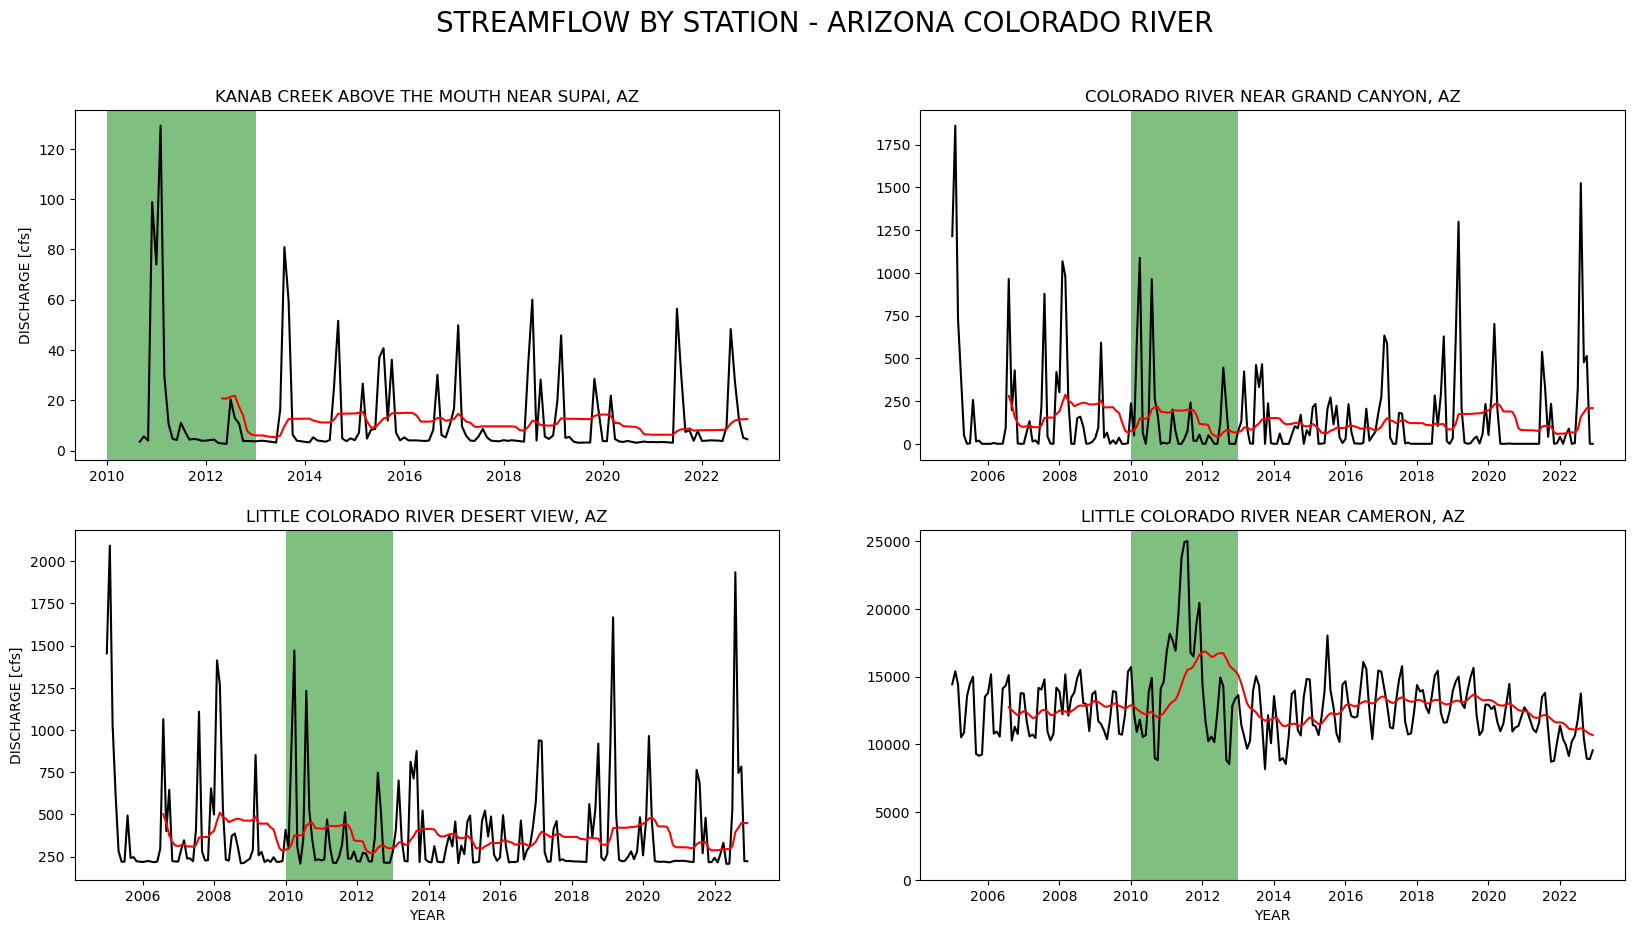

In [71]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
fig.suptitle('STREAMFLOW BY STATION - ARIZONA COLORADO RIVER', fontsize=20)

axes[0,0].plot(df_09403850['date'], df_09403850['mean_va'], c='k')
axes[0,0].set_title('KANAB CREEK ABOVE THE MOUTH NEAR SUPAI, AZ')
axes[0,0].set_ylabel('DISCHARGE [cfs]')
axes[0,0].axvspan('2010-01-01', '2013-01-01', facecolor='g', alpha=0.5)
axes[0,0].plot(df_09403850['date'], df_09403850['SMA30'], color='r')

axes[1,0].plot(df_09402300['date'], df_09402300['mean_va'], c='k')
axes[1,0].set_title('LITTLE COLORADO RIVER DESERT VIEW, AZ')
axes[1,0].set_ylabel('DISCHARGE [cfs]')
axes[1,0].set_xlabel('YEAR')
axes[1,0].axvspan('2010-01-01', '2013-01-01', facecolor='g', alpha=0.5)
axes[1,0].plot(df_09402300['date'], df_09402300['SMA30'], color='r')

axes[0,1].plot(df_09402000['date'], df_09402000['mean_va'], c='k')
axes[0,1].set_title('COLORADO RIVER NEAR GRAND CANYON, AZ')
axes[0,1].axvspan('2010-01-01', '2013-01-01', facecolor='g', alpha=0.5)
axes[0,1].plot(df_09402000['date'], df_09402000['SMA30'], color='r')

axes[1,1].plot(df_09402500['date'], df_09402500['mean_va'], c='k')
axes[1,1].set_title('LITTLE COLORADO RIVER NEAR CAMERON, AZ')
axes[1,1].set_ylim(0)
axes[1,1].set_xlabel('YEAR')
axes[1,1].axvspan('2010-01-01', '2013-01-01', facecolor='g', alpha=0.5)
axes[1,1].plot(df_09402500['date'], df_09402500['SMA30'], color='r')

plt.savefig('../figures/seperated_streamflow.png')
plt.show()